In [45]:
import numpy as np
import pandas as pd
import  seaborn  as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("Movie_regression.csv", header=0)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

-problem to be solved
--missing value in Time taken
--dummies in Genre,3D_available
-outliers problems
--marrketting expenses both upper and lower
--twiter_hashtag upper lvl
--budget


Missing Value Imputation

In [48]:
df["Time_taken"].mean()
df["Time_taken"].fillna(value = df["Time_taken"].mean(), inplace = True)


Dummy Variable creation

In [49]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [50]:
df = pd.get_dummies(df,columns=["3D_available","Genre"], drop_first=True)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [51]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.551383,0.306324,0.191700,0.361660
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,30.921101,104.779133,12.513697,106.332889,18364.351764,0.497845,0.461422,0.394028,0.480957
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.690000,223.796000,28.000000,465.000000,34050.000000,0.000000,0.000000,0.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,158.980000,254.400000,39.000000,535.500000,42400.000000,1.000000,0.000000,0.000000,0.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.520000,283.416000,50.000000,614.750000,50000.000000,1.000000,1.000000,0.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
#function  for plt
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

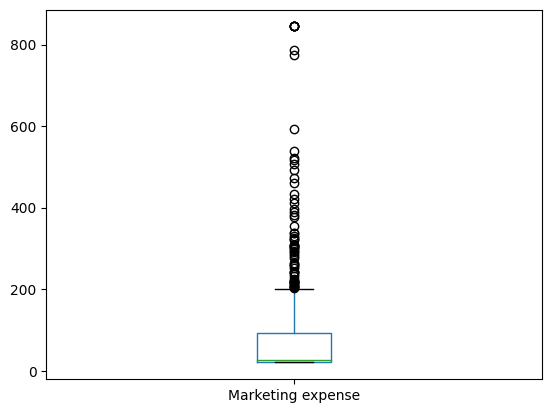

In [63]:
plot_boxplot(df,'Marketing expense')

In [58]:
#using percentile method to get the upper_liit and lower_limit
upper_limit=df['Marketing expense'].quantile(0.99)
lower_limit=df['Marketing expense'].quantile(0.01)

print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 844.3880699999986
lower_limit: 20.2724095


In [59]:
#getting the outliers
df.loc[(df['Marketing expense']>=upper_limit) | (df['Marketing expense']<=lower_limit)]

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.27221,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
54,20.27221,63.00,0.590,32707.840,121.1,6.300,6.365,6.200,6.500,6.78,410055,173.56,303.024,55,387,37800,1,1,0,0
55,20.27221,57.44,0.597,40268.195,95.4,5.550,5.795,5.605,5.655,8.42,512329,150.16,265.664,50,480,70800,1,0,0,1
284,20.27221,60.94,0.600,39373.840,94.3,6.280,6.500,6.180,6.425,7.94,489220,156.88,245.152,30,424,64400,1,0,0,0
285,20.27221,59.50,0.611,35846.415,105.4,6.335,6.445,6.260,6.345,7.94,511643,208.80,283.520,55,347,44000,1,1,0,0
341,20.27221,58.04,0.558,40223.755,122.8,6.340,6.520,6.410,6.655,8.90,516919,125.08,265.232,48,525,65400,1,1,0,0
380,847.40660,91.20,0.329,38707.240,165.4,9.170,9.430,9.155,9.410,6.96,417588,188.16,281.664,21,666,20800,1,1,0,0
404,847.40660,91.20,0.307,30724.705,158.9,9.050,9.220,9.185,9.330,7.96,312011,169.40,221.360,56,615,17000,0,1,0,0
405,847.40660,91.20,0.307,31569.065,173.5,9.235,9.405,9.280,9.230,6.96,342621,146.00,280.800,38,654,10000,1,0,0,1
410,847.40660,91.20,0.403,31980.135,173.5,9.155,9.340,9.210,9.470,6.96,474055,192.00,222.400,52,617,30000,0,0,0,1


In [61]:
#using capping method
df.loc[df['Marketing expense']>=upper_limit, 'Marketing expense']=upper_limit
df.loc[df['Marketing expense']<=lower_limit, 'Marketing expense']=lower_limit